# Данные по афазии

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_rel

### загрузка данных

In [ ]:
df_healthy = pd.read_excel('/content/Копия_clusters_dataset.xlsx',
                           sheet_name='healthy_all')
df_aphasia = pd.read_excel('/content/Копия_clusters_dataset.xlsx',
                           sheet_name='aphasia_all')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Копия_clusters_dataset.xlsx'

In [ ]:
df_aphasia = df_aphasia.iloc[:68]

In [ ]:
df_healthy = df_healthy.iloc[:94]

### различия между нормой и афазией

размер кластеров

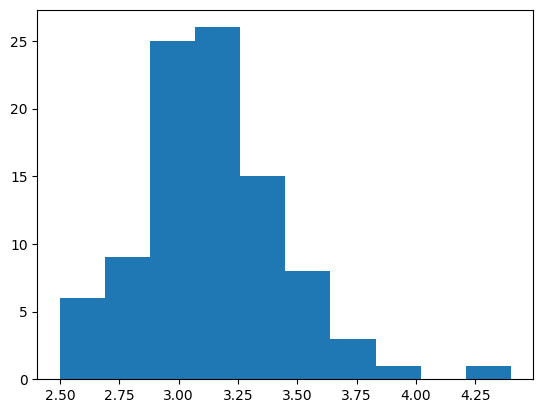

In [ ]:
plt.hist(df_healthy.Mean_cluster_size)
plt.show()

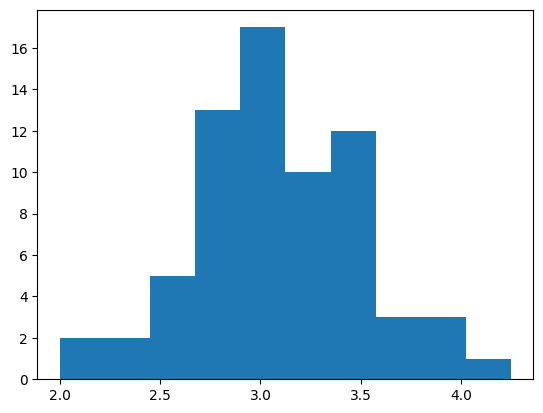

In [ ]:
plt.hist(df_aphasia.Mean_cluster_size)
plt.show()

In [ ]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [ ]:
t_test, p = ttest_ind(df_healthy.Mean_cluster_size, df_aphasia.Mean_cluster_size)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 1.072319555088662, p-value: 0.285191245908281


In [ ]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Same distributions (H0)


кол-во свитчей

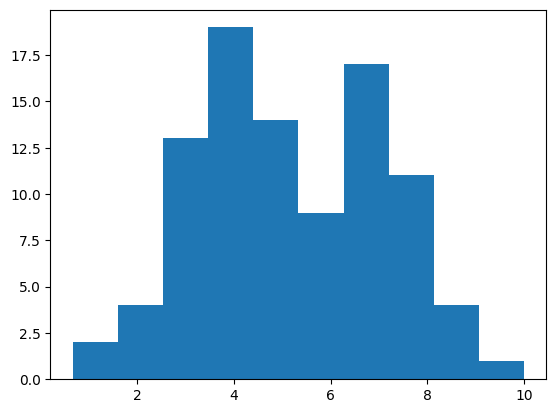

In [ ]:
plt.hist(df_healthy.Avg_switch_number)
plt.show()

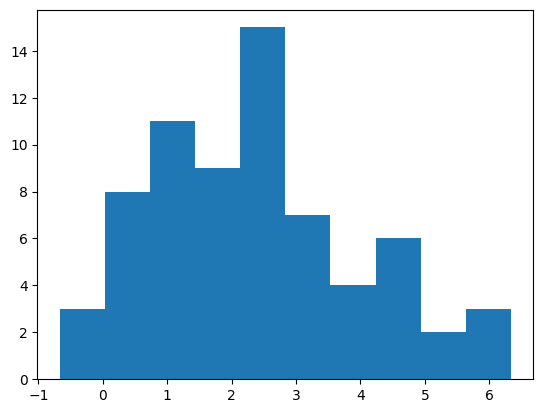

In [ ]:
plt.hist(df_aphasia.Avg_switch_number)
plt.show()

In [ ]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [ ]:
t_test, p = ttest_ind(df_healthy.Avg_switch_number, df_aphasia.Avg_switch_number)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 10.17586404392428, p-value: 4.5583124566748045e-19


In [ ]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


t-score

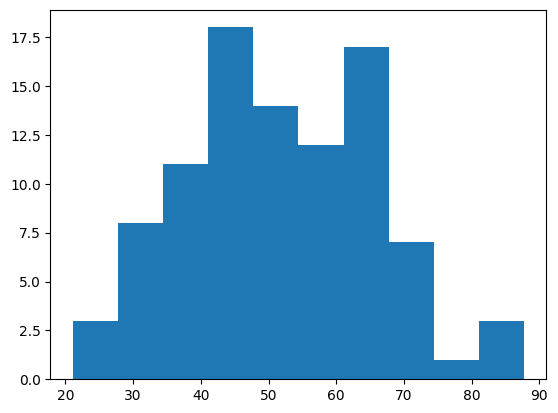

In [ ]:
plt.hist(df_healthy.Average_cluster_t_score)
plt.show()

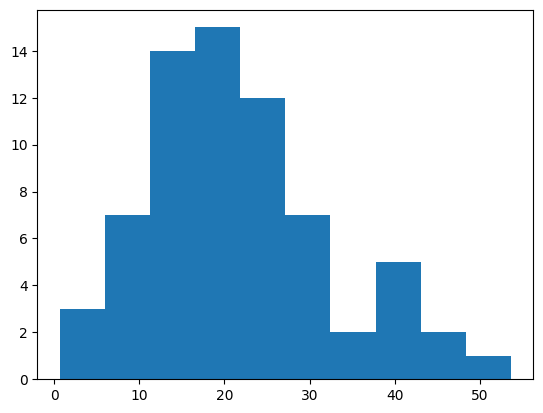

In [ ]:
plt.hist(df_aphasia.Average_cluster_t_score)
plt.show()

In [ ]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [ ]:
t_test, p = ttest_ind(df_healthy.Average_cluster_t_score, df_aphasia.Average_cluster_t_score)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 14.507723707344793, p-value: 5.609725990995729e-31


In [ ]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


silhouette-score

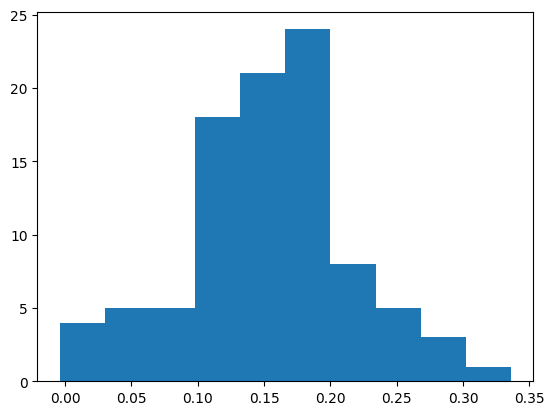

In [ ]:
plt.hist(df_healthy.Average_silhouette_score)
plt.show()

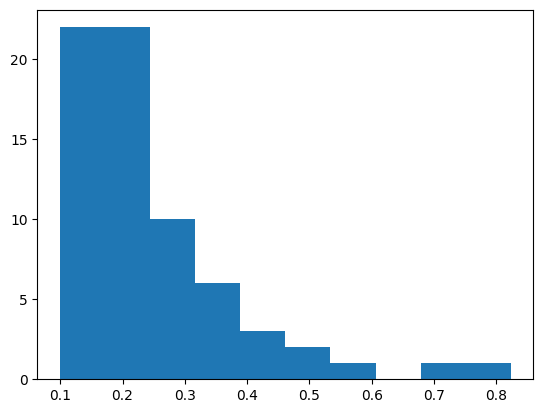

In [ ]:
plt.hist(df_aphasia.Average_silhouette_score)
plt.show()

In [ ]:
# распределения разные, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

In [ ]:
u_test, p = mannwhitneyu(df_healthy.Average_cluster_t_score, df_aphasia.Average_cluster_t_score)
print(f'statistic: {u_test}, p-value: {p}')

statistic: 6088.0, p-value: 9.898488587458599e-23


In [ ]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


### отличия метрик по категории "профессии"

t-score - проверяем попарно между всеми категориями

In [ ]:
# между категориями "города" и "животные"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_animals, df_healthy.Mean_cluster_t_score_cities)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 1.7613288740905845e-11
Different distributions (reject H0)


In [ ]:
# между категориями "профессии" и "животные"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_animals, df_healthy.Mean_cluster_t_score_professions)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 2.2538163712931107e-28
Different distributions (reject H0)


In [ ]:
# между категориями "города" и "профессии"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_professions, df_healthy.Mean_cluster_t_score_cities)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 2.6750776286951394e-14
Different distributions (reject H0)


# Данные по ПР: тексты

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_rel



### загрузка данных

In [ ]:
df_healthy = pd.read_excel('clusters_metrics_dataset.xlsx',
                           sheet_name='healthy').loc[0:500]
df_pd = pd.read_excel('clusters_metrics_dataset.xlsx',
                           sheet_name='PD').loc[0:68]

In [ ]:
df_healthy

,speakerID,tokens,Switch_number_tokens,Mean_cluster_size_tokens,Mean_distance_tokens,Silhouette_score_tokens,Mean_cluster_t_score_tokens,tokens_without_stops,Switch_number_tokens_without_stops,Mean_cluster_size_tokens_without_stops,...,Mean_cluster_size_lemmas,Mean_distance_lemmas,Silhouette_score_lemmas,Mean_cluster_t_score_lemmas,lemmas_without_stops,Switch_number_lemmas_without_stops,Mean_cluster_size_lemmas_without_stops,Mean_distance_lemmas_without_stops,Silhouette_score_lemmas_without_stops,Mean_cluster_t_score_lemmas_without_stops
0,PN-01,"[['необходимо', 'на', 'пол', 'положить', 'стол...",42.0,5.661765,0.428440,0.199664,508.109940,"[['необходимо', 'пол', 'положить', 'столешницу...",30.0,7.166667,...,5.632353,0.489722,0.273070,720.614508,"[['необходимый', 'пол', 'положить', 'столешниц...",28.0,7.111111,0.480149,0.251540,266.433253
1,PN-01,"[['самым', 'запоминающимся', 'подарком', 'был'...",14.0,5.370370,0.491251,0.185619,299.437973,"[['самым', 'запоминающимся', 'подарком', 'посл...",8.0,6.647059,...,5.290909,0.529752,0.268354,344.497041,"[['самым', 'запоминаться', 'подарок', 'последн...",8.0,6.606061,0.430015,0.130678,201.500834
2,PN-01,"[['человек', 'был', 'очень', 'завистливый', 'о...",21.0,5.287671,0.479614,0.225259,375.861670,"[['человек', 'очень'], ['завистливый', 'он'], ...",14.0,6.872340,...,5.438356,0.543546,0.242556,418.212941,"[['человек', 'очень'], ['завистливый', 'он', '...",16.0,7.085106,0.448142,0.191347,124.501709
3,PN-02,"[['переверните', 'крышку', 'табурета'], ['тыль...",41.0,6.311688,0.417164,0.121933,560.059015,"[['переверните', 'крышку', 'табурета'], ['тыль...",33.0,7.600000,...,6.168831,0.464152,0.202697,752.209701,"[['перевернуть', 'крышка', 'табурет'], ['тыльн...",34.0,7.434783,0.491429,0.234994,522.506322
4,PN-02,"[['когда', 'я', 'еще', 'училась', 'в'], ['школ...",26.0,4.277108,0.442196,0.091095,277.014617,"[['когда', 'училась', 'школе', 'ко'], ['приеха...",16.0,5.755556,...,4.277108,0.476511,0.064982,412.210461,"[['когда', 'учиться', 'школа', 'к'], ['приехат...",15.0,5.755556,0.460531,0.161854,78.469512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,TPN-14,"[['аудио', 'запись'], ['четыре', 'как', 'собра...",39.0,5.956140,0.380374,0.081968,434.597173,"[['аудио', 'запись'], ['четыре', 'как', 'собра...",28.0,7.271605,...,5.793103,0.461374,0.182359,796.732069,"[['аудио', 'запись'], ['четыре', 'как', 'собра...",23.0,7.123457,0.496351,0.243205,328.805058
497,TPN-14,"[['аудио', 'запись', 'три'], ['расскажите', 'п...",59.0,4.606481,0.463193,0.139887,1058.478950,"[['аудио', 'запись', 'расскажите'], ['лучший',...",37.0,5.968504,...,4.600917,0.510201,0.184970,1110.119659,"[['аудио', 'запись'], ['рассказать', 'хороший'...",40.0,5.937984,0.453659,0.159204,431.789151
498,TPN-14,"[['аудио', 'запись', 'три'], ['расскажите', 'п...",55.0,5.010526,0.476894,0.141315,831.235427,"[['аудио', 'запись', 'расскажите'], ['лучшее',...",36.0,6.533898,...,4.831633,0.537384,0.215904,857.269822,"[['аудио', 'запись'], ['рассказать', 'хороший'...",35.0,6.280992,0.464673,0.186818,328.893759
499,TPN-14,"[['рассказываю', 'подробную', 'историю', 'изоб...",107.0,4.952632,0.430530,0.137201,1282.022786,"[['рассказываю', 'подробную', 'историю'], ['из...",75.0,6.118321,...,4.825193,0.504320,0.200648,1749.997580,"[['рассказывать', 'подробный', 'история'], ['и...",71.0,6.097656,0.439236,0.126299,652.268839


In [ ]:
df_pd

,ID,tokens,Switch_number_tokens,Mean_cluster_size_tokens,Mean_distance_tokens,Silhouette_score_tokens,Mean_cluster_t_score_tokens,tokens_without_stops,Switch_number_tokens_without_stops,Mean_cluster_size_tokens_without_stops,...,Mean_cluster_size_lemmas,Mean_distance_lemmas,Silhouette_score_lemmas,Mean_cluster_t_score_lemmas,lemmas_without_stops,Switch_number_lemmas_without_stops,Mean_cluster_size_lemmas_without_stops,Mean_distance_lemmas_without_stops,Silhouette_score_lemmas_without_stops,Mean_cluster_t_score_lemmas_without_stops
0,PD-001,"[['ну', 'больше', 'всего'], ['меня', 'впечатли...",13.0,5.142857,0.477241,0.105110,173.356602,"[['ну', 'впечатлил'], ['подарок', 'день', 'рож...",7.0,7.086957,...,5.122449,0.505469,0.152961,156.245227,"[['ну', 'впечатлить'], ['подарок', 'день', 'ро...",6.0,7.043478,0.429536,-0.000615,57.621324
1,PD-002,"[['не', 'такой'], ['уж', 'обычный', 'традицион...",44.0,4.568047,0.536971,0.198468,513.820124,"[['не', 'обычный', 'традиционный', 'подарок', ...",28.0,6.170455,...,4.552941,0.563129,0.238804,618.934870,"[['не', 'обычный', 'традиционный', 'подарок'],...",27.0,6.125000,0.515226,0.238879,186.308039
2,PD-004,"[['я', 'была'], ['в', 'начальных', 'классах'],...",44.0,4.629371,0.481372,0.271767,405.407193,"[['я', 'начальных', 'классах'], ['я', 'очень']...",26.0,5.688889,...,4.414966,0.535013,0.139313,58.018152,"[['я', 'начальный', 'класс'], ['я', 'очень'], ...",25.0,5.428571,0.483758,-0.006125,123.475970
3,PD-005,"[['я', 'не', 'помню'], ['свои', 'подарки'], ['...",20.0,4.696970,0.453224,0.113918,185.315282,"[['я', 'помню'], ['свои', 'подарки'], ['наверн...",14.0,6.125000,...,4.651515,0.491485,0.157894,201.299511,"[['я', 'помнить'], ['свой', 'подарок'], ['наве...",13.0,6.000000,0.452364,0.135730,69.276025
4,PD-006,"[['так', 'мне', 'запомнился', 'подарок'], ['ко...",38.0,4.682432,0.517010,0.198442,382.635544,"[['запомнился', 'подарок', 'молодой', 'человек...",23.0,6.105882,...,4.705479,0.528634,0.230140,334.452118,"[['запомниться', 'подарок'], ['молодой', 'чело...",25.0,6.180723,0.472370,0.160692,133.754792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,PD-076,"[['это', 'подарок'], ['собака', 'на', 'новый',...",6.0,4.125000,0.462674,0.207923,92.680873,"[['это', 'подарок'], ['собака', 'новый', 'год'...",5.0,5.133333,...,4.083333,0.521235,0.270448,82.135843,"[['это', 'подарок'], ['собака', 'новый', 'год'...",4.0,5.066667,0.558888,0.354476,35.920577
65,PD-078,"[['так', 'ну'], ['хорошо', 'у', 'меня'], ['ког...",40.0,4.402685,0.524687,0.204499,540.656197,"[['так', 'у'], ['времени', 'сходить', 'подарко...",22.0,6.597015,...,4.284768,0.526479,0.195216,625.599975,"[['так', 'у'], ['время', 'сходить', 'подарок']...",19.0,6.275362,0.497606,0.145375,137.889794
66,PD-079,"[['однажды', 'с'], ['папой', 'мы'], ['поехали'...",23.0,4.506024,0.446506,0.214002,175.639552,"[['однажды', 'папой'], ['поехали', 'крым'], ['...",18.0,5.655172,...,4.518072,0.489120,0.144007,160.300200,"[['однажды', 'папа', 'поехать', 'крым'], ['ост...",17.0,5.655172,0.479644,0.131802,93.652401
67,PD-080,"[['я', 'один', 'раз'], ['пошла', 'гулять', 'с'...",15.0,4.339623,0.485405,0.223821,101.878658,"[['я', 'пошла'], ['гулять', 'кошкой', 'спрыгну...",7.0,5.580645,...,4.264151,0.473115,0.180901,107.668551,"[['я', 'пойти', 'гулять', 'кошка', 'спрыгнуть'...",10.0,5.451613,0.457827,0.158249,47.506969


### проверка нормальности распределений

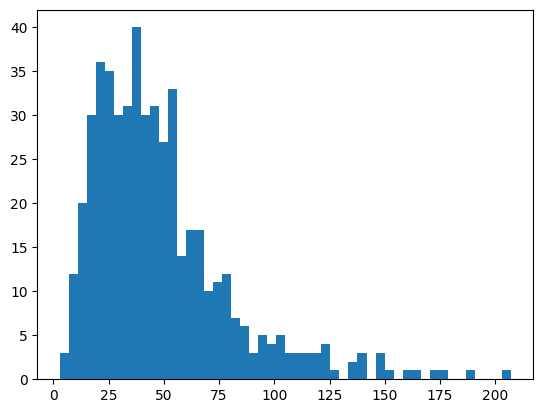

In [ ]:
# 1. number of switches
plt.hist(df_healthy['Switch_number_tokens'], bins=50)
plt.show()

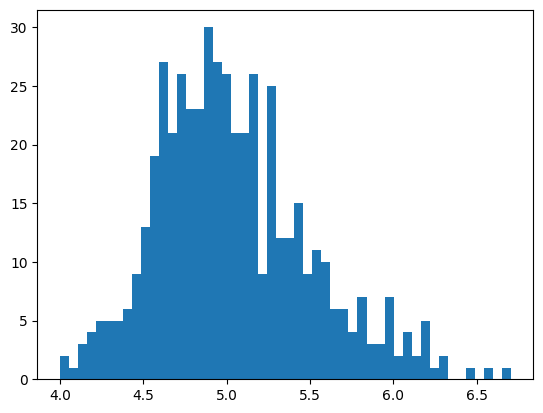

In [ ]:
# 2. cluster size
plt.hist(df_healthy['Mean_cluster_size_tokens'], bins=50)
plt.show()

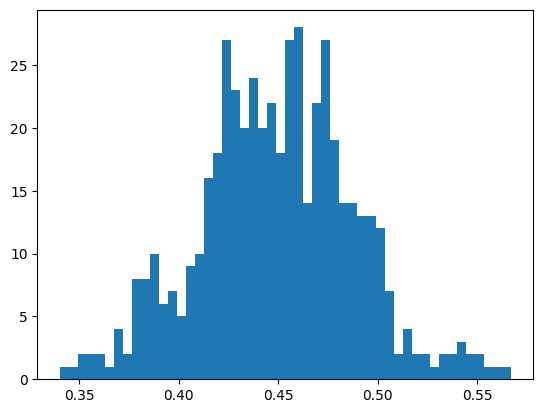

In [ ]:
# 3. distance
plt.hist(df_healthy['Mean_distance_tokens'], bins=50)
plt.show()

(-0.5, 0.6)

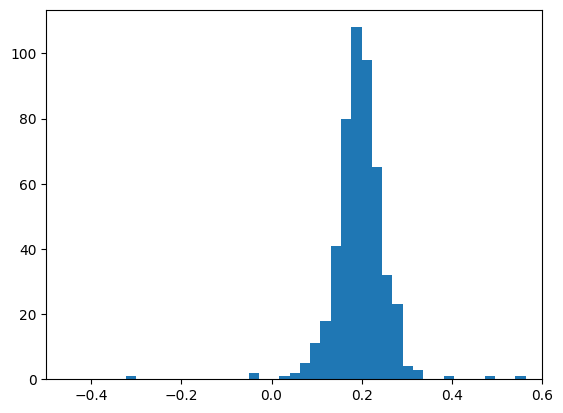

In [ ]:
# 4. silhouette score
plt.hist(df_healthy['Silhouette_score_tokens'], bins=300)
plt.xlim([-0.5, 0.6])

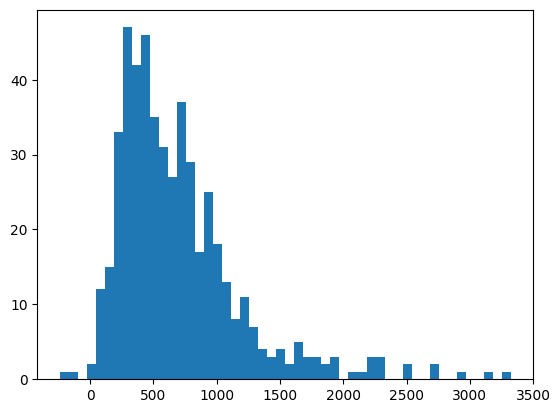

In [ ]:
# 5. t-score
plt.hist(df_healthy['Mean_cluster_t_score_tokens'], bins=50)
plt.show()

### проверка статистической значимости

In [ ]:
# 1. number of switches
# распределения неизвестны, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

u_test, p = mannwhitneyu(df_healthy['Switch_number_tokens'], df_pd['Switch_number_tokens'], nan_policy='omit')
print(f'statistic: {u_test}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 26086.0, p-value: 6.747075207668067e-12
Different distributions (reject H0)


In [ ]:
# 2. cluster size
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Mean_cluster_size_tokens'], df_pd['Mean_cluster_size_tokens'], nan_policy='omit')
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 4.853105119392563, p-value: 1.572550029955769e-06
Different distributions (reject H0)


In [ ]:
# 3. distance
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Mean_distance_tokens'], df_pd['Mean_distance_tokens'], nan_policy='omit')
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: -5.1360865278815435, p-value: 3.8610849103148997e-07
Different distributions (reject H0)


In [ ]:
# 4. silhouette score
# распределения известны, нормальны, поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

ttest, p = ttest_ind(df_healthy['Silhouette_score_tokens'], df_pd['Silhouette_score_tokens'], nan_policy='omit')
print(f'statistic: {ttest}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 0.34285724722795646, p-value: 0.7318327035185073
Same distributions (H0)


In [ ]:
# 5. t-score
# распределения неизвестны, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

u_test, p = mannwhitneyu(df_healthy['Mean_cluster_t_score_tokens'], df_pd['Mean_cluster_t_score_tokens'], nan_policy='omit')
print(f'statistic: {u_test}, p-value: {p}')

alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 29187.0, p-value: 1.6944015195136315e-20
Different distributions (reject H0)
